# Boxplot of ice thickness observations and gridded model output

In [12]:
#Ben Pelto June 20 2019

import seaborn as sns
import pandas as pd
import pickle 
# from PIL import Image
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [13]:
# path = '/home/pelto/'

path = '/home/pelto/GIS/GPR/ComparisonData/'
path2 = '/home/pelto/oggm_runs/products_opt/'
data = pd.read_csv(path + 'all_comp_final.csv')
# dc =  xr.open_dataset(path2 + 'Conrad/' + 'Conrad_optimized.nc')
# nor_h_25 = Image.open(path + 'nordic_h_25m_gpr_locs_srtm_corr.tif')
# nor_gpr_25 = Image.open(path + 'nordic_gpr_final_25m_test.tif')
# nor_c_200 = Image.open(path + 'nordic_c_200m_gpr_locs_srtm_corr.tif')

In [14]:
data[:5]

,E,N,Z,glacier,source,resolution
0,451413.14631,5.698616e+06,8.752930,Nordic,Clarke,200
1,451613.14631,5.698616e+06,6.357178,Nordic,Clarke,200
2,450813.14631,5.698416e+06,34.104736,Nordic,Clarke,200
3,451213.14631,5.698416e+06,45.496094,Nordic,Clarke,200
4,451413.14631,5.698416e+06,34.597656,Nordic,Clarke,200


In [15]:
# np.array(dc.distributed_thickness)

# BEN!!!! (1) I love you lots (2) look at my code below!
It seems like you don't have an optimized.nc file for each glacier yet but once you do this will loop through the glaciers, open the array, pull out each distributed thickness (each value in that array) and put it in your table along with the glacier name and source (which I am calling optimized). You can do this for your other dataset you want to add as well, just change the source name! 

P.S. Miss you already 
P.P.S text/call me if you have questions!

In [16]:
glacier= ["Zillmer", "Nordic","Illecillewaet", "Washmawapta", "Haig", "Conrad", "Kokanee"]
glacier_abb = ["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig", "Conrad", "Kokanee"]
count = 0
for G in glacier: 
    #open file by glacier name
    infile = open(path2 + '%s/'%G + '%s_optimized_gprlocs.pkl'%G,'rb')
#     infile2 = open(path2 + '%s/'%G + '%s_regional_gprlocs.pkl'%G,'rb')
    dc = pickle.load(infile)
#     dc2 = pickle.load(infile2)
        
    #remove distriubuted thickness array
    K=np.array(dc)#.distributed_thickness)
#     K2=K=np.array(dc2)

    #find where there are values in this array
    IDX= np.ma.where(K > 0, )
#     IDX2= np.ma.where(K2 > 0, )
    
    # pull out each value and save it in the dataframe called data
    for i in np.arange(0,len(IDX[0])):
        V=K[IDX[0][i]][IDX[1][i]]
        
#     for i in np.arange(0,len(IDX2[0])):
#         V2=K2[IDX2[0][i]][IDX2[1][i]]
    
        data=data.append({'Z': V,'glacier':glacier_abb[count],'source':'Optimized'},ignore_index=True)
#         data=data.append({'Z': V2,'glacier':glacier_abb[count],'source':'Regional'},ignore_index=True)

    count+=1

/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [17]:
count = 0
for G in glacier: 
    #open file by glacier name
    infile2 = open(path2 + '%s/'%G + '%s_regional_gprlocs.pkl'%G,'rb')
    dc2 = pickle.load(infile2)
        
    #remove distriubuted thickness array
    K2=K=np.array(dc2)

    #find where there are values in this array
    IDX2= np.ma.where(K2 > 0, )
    
    # pull out each value and save it in the dataframe called data
    for i in np.arange(0,len(IDX2[0])):
        V2=K2[IDX2[0][i]][IDX2[1][i]]
    
        data=data.append({'Z': V2,'glacier':glacier_abb[count],'source':'Regional'},ignore_index=True)

    count+=1

/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


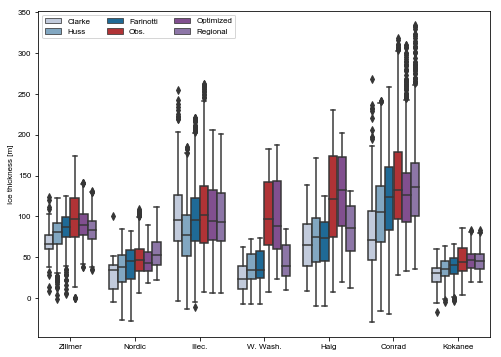

In [18]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(7, 5)) #(10, 8))

# sns.set(style="ticks", font='arial', fontsize=8)#, font_scale=1.5)

colors = ['#bdc9e1', '#74a9cf', '#0570b0', '#cb181d', '#88419d', '#8c6bb1'] #, '#8c96c6']

ax = sns.boxplot(x=data.glacier, y=data.Z, hue=data.source, palette=colors, hue_order= ['Clarke', 'Huss', 
            'Farinotti', 'Obs.', 'Optimized', 'Regional'], order=["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig",
                "Conrad", "Kokanee"], saturation=0.7)

# ax.legend((data.source['Clarke'], ds['Huss'], ds['Farinotti'], ds['Obs.'], ds['optimized']),('Clarke 2013', 'Huss 2012', 'Farinotti 2019', 'Obs.', 'Optimized'), ncol = 3, loc = 'best') 
ax.legend(ncol = 3, loc = 'best') 
ax.set(xlabel='', ylabel='Ice thickness [m]')
plt.tight_layout()
plt.savefig('/home/pelto/Desktop/ice_thick/' + 'ice_thickness_boxplot_opt.png', dpi=300)
plt.show()